In [2]:
import pandas as pd
import numpy as np

In [3]:
krname = pd.read_csv('data/krnames/y2008.txt', names=['name','gender','births'])
krname

,name,gender,births
0,서연,F,3280
1,민서,F,2873
2,지민,F,2826
3,서현,F,2606
4,서윤,F,2484
...,...,...,...
995,은율,M,91
996,재연,M,91
997,건민,M,91
998,민상,M,90


In [4]:
krname.groupby('gender').births.sum()

gender
F    191282
M    169063
Name: births, dtype: int64

In [5]:
years = range(2008,2020)
pieces = []
columns = ['name','gender','births']

for year in years :
    path = 'data/krnames/y{}.txt'.format(year)
    frame = pd.read_csv(path, names = columns)
    frame['year']=year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)
names

,name,gender,births,year
0,서연,F,3280,2008
1,민서,F,2873,2008
2,지민,F,2826,2008
3,서현,F,2606,2008
4,서윤,F,2484,2008
...,...,...,...,...
11995,민희,F,43,2019
11996,레아,F,43,2019
11997,이랑,F,43,2019
11998,가원,F,42,2019


In [6]:
total_births = names.pivot_table('births', index = 'year', columns = 'gender', aggfunc = sum)
total_births

gender,F,M
year,,
2008,191282,169063
2009,186337,166347
2010,195842,177375
2011,199164,180055
2012,204024,185399
2013,189671,173103
2014,187089,174520
2015,190049,178228
2016,176951,165692


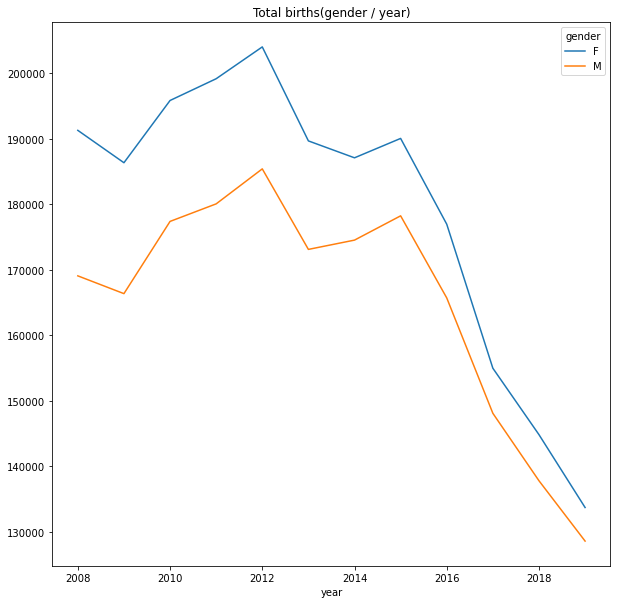

In [7]:
total_births.plot(title = 'Total births(gender / year)',figsize=(10,10))

In [8]:
def add_prop(group) :
    group['prop'] = group.births / group.births.sum()
    return group

In [9]:
names = names.groupby(['year', 'gender']).apply(add_prop)
names

,name,gender,births,year,prop
0,서연,F,3280,2008,0.017147
1,민서,F,2873,2008,0.015020
2,지민,F,2826,2008,0.014774
3,서현,F,2606,2008,0.013624
4,서윤,F,2484,2008,0.012986
...,...,...,...,...,...
11995,민희,F,43,2019,0.000322
11996,레아,F,43,2019,0.000322
11997,이랑,F,43,2019,0.000322
11998,가원,F,42,2019,0.000314


In [10]:
names.groupby(['year', 'gender']).prop.sum()

year  gender
2008  F         1.0
      M         1.0
2009  F         1.0
      M         1.0
2010  F         1.0
      M         1.0
2011  F         1.0
      M         1.0
2012  F         1.0
      M         1.0
2013  F         1.0
      M         1.0
2014  F         1.0
      M         1.0
2015  F         1.0
      M         1.0
2016  F         1.0
      M         1.0
2017  F         1.0
      M         1.0
2018  F         1.0
      M         1.0
2019  F         1.0
      M         1.0
Name: prop, dtype: float64

## 연도별 / 성별에 따른 선호하는 이름 100개 추출

In [11]:
names

,name,gender,births,year,prop
0,서연,F,3280,2008,0.017147
1,민서,F,2873,2008,0.015020
2,지민,F,2826,2008,0.014774
3,서현,F,2606,2008,0.013624
4,서윤,F,2484,2008,0.012986
...,...,...,...,...,...
11995,민희,F,43,2019,0.000322
11996,레아,F,43,2019,0.000322
11997,이랑,F,43,2019,0.000322
11998,가원,F,42,2019,0.000314


In [12]:
def get_top100(group) :
    return group.sort_values(by = 'births', ascending = False)[:100]

In [13]:
grouped = names.groupby(['year', 'gender'])
grouped

In [14]:
top100 = grouped.apply(get_top100)
top100

name gender  births  year      prop
year gender                                          
2008 F      0       서연      F    3280  2008  0.017147
            1       민서      F    2873  2008  0.015020
            2       지민      F    2826  2008  0.014774
            3       서현      F    2606  2008  0.013624
            4       서윤      F    2484  2008  0.012986
...                ...    ...     ...   ...       ...
2019 M      11095   지성      M     335  2019  0.002606
            11096   서원      M     326  2019  0.002536
            11097   태준      M     324  2019  0.002520
            11098    건      M     320  2019  0.002489
            11099   서후      M     317  2019  0.002466

[2400 rows x 5 columns]

In [15]:
top100.reset_index(inplace=True, drop=True)
top100

,name,gender,births,year,prop
0,서연,F,3280,2008,0.017147
1,민서,F,2873,2008,0.015020
2,지민,F,2826,2008,0.014774
3,서현,F,2606,2008,0.013624
4,서윤,F,2484,2008,0.012986
...,...,...,...,...,...
2395,지성,M,335,2019,0.002606
2396,서원,M,326,2019,0.002536
2397,태준,M,324,2019,0.002520
2398,건,M,320,2019,0.002489


## 상위 100개의 이름데이터를 남자(boys)와 여자(grils)로 분리

In [16]:
boys = top100[top100.gender == 'M']
boys

,name,gender,births,year,prop
100,민준,M,2642,2008,0.015627
101,지훈,M,2154,2008,0.012741
102,현우,M,1924,2008,0.011380
103,준서,M,1885,2008,0.011150
104,우진,M,1815,2008,0.010736
...,...,...,...,...,...
2395,지성,M,335,2019,0.002606
2396,서원,M,326,2019,0.002536
2397,태준,M,324,2019,0.002520
2398,건,M,320,2019,0.002489


In [17]:
girls = top100[top100.gender == 'F']
girls

,name,gender,births,year,prop
0,서연,F,3280,2008,0.017147
1,민서,F,2873,2008,0.015020
2,지민,F,2826,2008,0.014774
3,서현,F,2606,2008,0.013624
4,서윤,F,2484,2008,0.012986
...,...,...,...,...,...
2295,예빈,F,367,2019,0.002745
2296,유빈,F,361,2019,0.002700
2297,수민,F,358,2019,0.002678
2298,지은,F,358,2019,0.002678


## 연도와 출생수를 피봇데이블로 변환

In [18]:
total_births = top100.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births

name,가연,가영,가온,가윤,가은,가현,강민,건,건우,건호,...,현수,현아,현우,현준,현지,현진,현호,형준,혜원,혜인
year,,,,,,,,,,,,,,,,,,,,,
2008,772.0,737.0,NaN,NaN,1571.0,728.0,NaN,532.0,1703.0,NaN,...,768.0,NaN,1924.0,1615.0,991.0,498.0,NaN,472.0,1007.0,NaN
2009,664.0,642.0,NaN,NaN,1703.0,677.0,519.0,489.0,1784.0,NaN,...,687.0,NaN,1909.0,1691.0,891.0,NaN,NaN,NaN,914.0,NaN
2010,652.0,598.0,NaN,554.0,1651.0,680.0,527.0,NaN,1945.0,531.0,...,701.0,576.0,2064.0,1989.0,822.0,NaN,494.0,NaN,1070.0,NaN
2011,NaN,NaN,NaN,734.0,1420.0,635.0,531.0,NaN,1746.0,NaN,...,583.0,586.0,2032.0,1785.0,687.0,NaN,NaN,NaN,966.0,646.0
2012,640.0,NaN,NaN,720.0,1333.0,659.0,493.0,NaN,2050.0,NaN,...,517.0,NaN,2055.0,1560.0,NaN,NaN,NaN,NaN,725.0,NaN
2013,NaN,NaN,NaN,782.0,1121.0,NaN,454.0,NaN,1577.0,NaN,...,468.0,NaN,1861.0,1426.0,NaN,NaN,NaN,NaN,660.0,NaN
2014,NaN,NaN,NaN,600.0,1044.0,NaN,NaN,485.0,1349.0,NaN,...,NaN,NaN,1784.0,1427.0,NaN,NaN,NaN,NaN,694.0,NaN
2015,NaN,NaN,1123.0,588.0,889.0,NaN,NaN,514.0,1479.0,NaN,...,NaN,NaN,1837.0,1294.0,NaN,NaN,NaN,NaN,561.0,NaN
2016,NaN,NaN,518.0,500.0,899.0,NaN,429.0,462.0,1524.0,NaN,...,NaN,NaN,1486.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2008 to 2019
Columns: 311 entries, 가연 to 혜인
dtypes: float64(311)
memory usage: 29.2 KB


In [20]:
subset = total_births[['지안', '지우', '서준', '시우']]
subset

name,지안,지우,서준,시우
year,,,,
2008,NaN,2815.0,1472.0,1245.0
2009,NaN,3541.0,1469.0,1533.0
2010,NaN,3762.0,1931.0,1861.0
2011,NaN,3933.0,2109.0,2131.0
2012,699.0,3938.0,2959.0,2338.0
2013,796.0,3749.0,3245.0,2042.0
2014,1577.0,3508.0,4139.0,1862.0
2015,2290.0,3783.0,3500.0,1925.0
2016,2690.0,3270.0,2898.0,2188.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022BB023E340>,
      dtype=object)

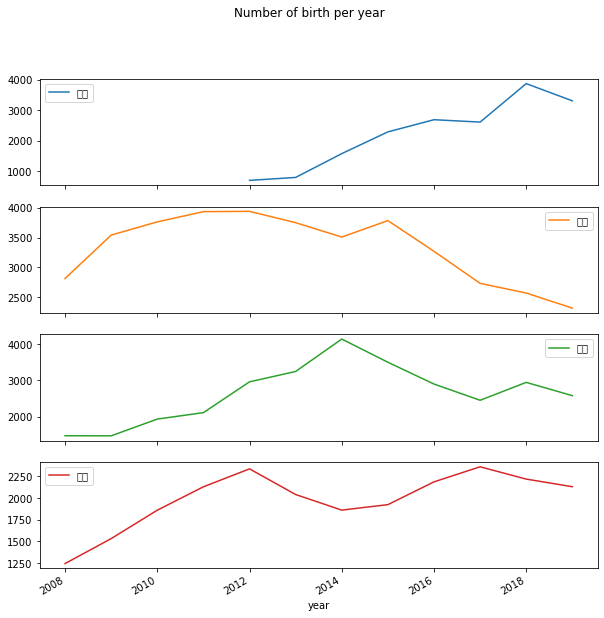

In [21]:
subset.plot(subplots=True, figsize=(10,10), grid=False, title='Number of birth per year')

In [22]:
import matplotlib.pyplot as plt
plt.figure()
table = top100.pivot_table('prop', index='year', columns='gender', aggfunc=sum)
table

gender,F,M
year,,
2008,0.578999,0.527945
2009,0.579783,0.538014
2010,0.571665,0.539687
2011,0.570670,0.551487
2012,0.574947,0.552797
2013,0.582466,0.556796
2014,0.595898,0.576415
2015,0.593721,0.578102
2016,0.588982,0.575888


<Figure size 432x288 with 0 Axes>

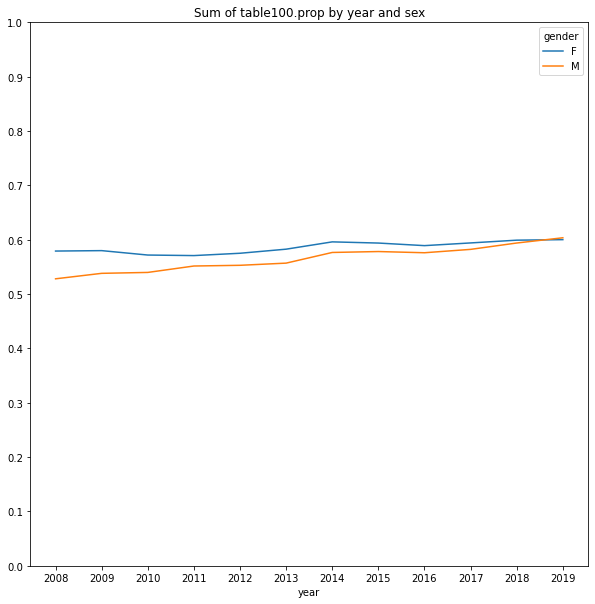

In [23]:
table.plot(title='Sum of table100.prop by year and sex',
           yticks=np.linspace(0, 1.0, 11), xticks=range(2008, 2020, 1), figsize=(10,10))

In [24]:
df = boys[boys.year==2008]
df

,name,gender,births,year,prop
100,민준,M,2642,2008,0.015627
101,지훈,M,2154,2008,0.012741
102,현우,M,1924,2008,0.011380
103,준서,M,1885,2008,0.011150
104,우진,M,1815,2008,0.010736
...,...,...,...,...,...
195,도훈,M,468,2008,0.002768
196,준수,M,466,2008,0.002756
197,준석,M,465,2008,0.002750
198,승훈,M,463,2008,0.002739


In [25]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum

100    0.015627
101    0.028368
102    0.039748
103    0.050898
104    0.061634
         ...   
195    0.517174
196    0.519930
197    0.522681
198    0.525420
199    0.527945
Name: prop, Length: 100, dtype: float64

In [26]:
prop_cumsum.index

Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
            113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
            126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
            139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
            152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
            165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
            178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
            191, 192, 193, 194, 195, 196, 197, 198, 199],
           dtype='int64')

In [27]:
prop_cumsum.values.searchsorted(0.5)+1

90

In [28]:
prop_cumsum.iloc[90]

0.5032502676517036

In [29]:
df = boys[boys.year==2019]
y2019 = df.sort_values(by='prop', ascending=False).prop.cumsum()
y2019.values.searchsorted(0.5)+1

65

In [30]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [31]:
diversity = top100.groupby(['year', 'gender']).apply(get_quantile_count)
diversity

year  gender
2008  F         75
      M         90
2009  F         75
      M         87
2010  F         77
      M         86
2011  F         78
      M         82
2012  F         77
      M         81
2013  F         75
      M         80
2014  F         71
      M         73
2015  F         72
      M         74
2016  F         72
      M         73
2017  F         71
      M         72
2018  F         69
      M         69
2019  F         68
      M         65
dtype: int64

In [32]:
diversity = diversity.unstack('gender')
diversity

gender,F,M
year,,
2008,75,90
2009,75,87
2010,77,86
2011,78,82
2012,77,81
2013,75,80
2014,71,73
2015,72,74
2016,72,73


<Figure size 432x288 with 0 Axes>

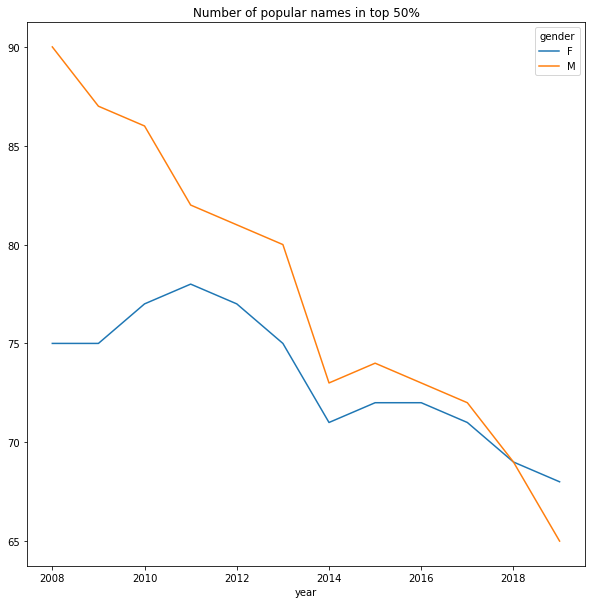

In [33]:
fig = plt.figure()
diversity.plot(title="Number of popular names in top 50%", figsize=(10,10))

## 남자이름 여자이름
## 공통부분 : '지'

In [34]:
all_names = pd.Series(top100.name.unique())
jee_like = all_names[all_names.str.contains('지')]
jee_like

2      지민
6      지우
12     지윤
14     민지
16     지원
30     지현
33     지은
37     윤지
43     현지
44     지수
46     예지
48     은지
55     지유
57     지연
75     지영
80     지아
82     지혜
96     지후
101    지훈
119    지호
121    지환
143    지성
192    지효
221    지율
231    지안
240    지완
260    지한
269    지온
277    지오
dtype: object

In [35]:
filtered = top100[top100.name.isin(jee_like)]
filtered

,name,gender,births,year,prop
2,지민,F,2826,2008,0.014774
6,지우,F,2111,2008,0.011036
12,지윤,F,1886,2008,0.009860
14,민지,F,1805,2008,0.009436
16,지원,F,1778,2008,0.009295
...,...,...,...,...,...
2366,지율,M,454,2019,0.003531
2372,지원,M,429,2019,0.003337
2373,지민,M,415,2019,0.003228
2390,지완,M,350,2019,0.002722


In [36]:
filtered.groupby('name').births.sum()

name
민지    13070
예지     9301
윤지     7521
은지     2955
지민    26400
지성     6807
지수     6382
지아    17120
지안    17848
지연     4411
지영     1246
지오     1884
지온     2435
지완     4132
지우    39925
지원    26984
지유    21319
지윤    20018
지율    13965
지은     8533
지한     4908
지현     6868
지혜     1190
지호    22022
지환    12527
지효     1861
지후    22934
지훈    19673
현지     3391
Name: births, dtype: int64

In [37]:
table = filtered.pivot_table('births', index='year',
                             columns='gender', aggfunc='sum')
table

gender,F,M
year,,
2008,21749,8998
2009,21576,10169
2010,20587,10702
2011,21074,11265
2012,19235,11753
2013,19055,11376
2014,19261,12079
2015,19557,12211
2016,16320,12501


In [38]:
table = table.div(table.sum(1), axis=0)
table

gender,F,M
year,,
2008,0.707354,0.292646
2009,0.679666,0.320334
2010,0.657963,0.342037
2011,0.651659,0.348341
2012,0.620724,0.379276
2013,0.626171,0.373829
2014,0.614582,0.385418
2015,0.615619,0.384381
2016,0.566254,0.433746


<Figure size 432x288 with 0 Axes>

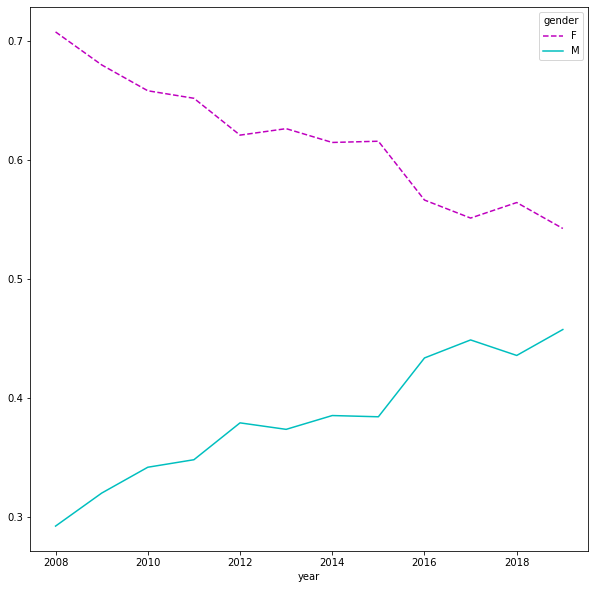

In [39]:
fig = plt.figure()
table.plot(style={'M': 'c-', 'F': 'm--'}, figsize=(10,10)) # c cyan m 마젠타